In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
#SVM

In [2]:
data = pd.read_csv('data/email-campaign-management-for-sme/Train_psolI3n.csv')

In [3]:
data.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [4]:
data.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

In [5]:
data.info() #80%, 16%, 3%

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


In [6]:
data.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


In [7]:
data['Total_Past_Communications'].unique()

array([33., 15., 36., 25., 18., nan, 34., 21., 40., 27., 24., 42., 11.,
       23., 37., 35., 51.,  9., 39., 31., 50., 30., 14., 45., 53., 28.,
        7., 38., 52., 22., 43., 12., 16., 20., 41., 56., 26., 29.,  5.,
       32., 44., 10., 17., 46., 47., 48.,  8., 49., 13.,  0.,  6., 55.,
       19., 60., 59., 61., 54., 62., 57., 64., 58., 65., 66., 67., 63.])

In [8]:
data['Total_Past_Communications'].value_counts()

30.0    2990
20.0    2925
25.0    2391
40.0    2251
35.0    1881
        ... 
63.0      40
64.0      36
65.0      33
66.0      18
67.0       9
Name: Total_Past_Communications, Length: 64, dtype: int64

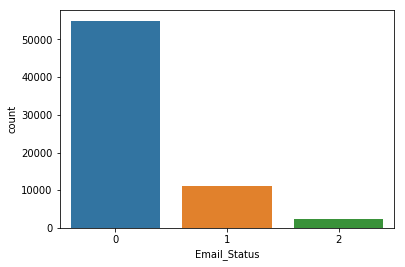

In [9]:
sns.countplot(x='Email_Status', data=data)

In [10]:
data[data['Email_Status'] == 0] #54941
data[data['Email_Status'] == 1] #11039
data[data['Email_Status'] == 2] #2373

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
84,EMA00081007015970,2,1.5,1,NaN,2,30.0,3,988,8.0,0.0,2
177,EMA00081016365090,1,1.6,1,D,2,20.0,2,1140,26.0,20.0,2
210,EMA00081018900840,2,0.1,2,NaN,3,43.0,2,392,8.0,6.0,2
222,EMA00081020301680,1,2.8,1,C,2,18.0,2,623,14.0,10.0,2
247,EMA00081022263580,1,0.0,1,G,3,41.0,2,771,11.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
68227,EMA00089881159500,1,0.2,1,G,3,34.0,2,1082,14.0,2.0,2
68255,EMA00089903682700,1,0.3,2,B,3,46.0,3,655,31.0,21.0,2
68304,EMA00089950773800,1,0.0,1,G,3,20.0,2,922,11.0,4.0,2
68318,EMA00089960453100,1,0.3,1,A,3,49.0,2,440,11.0,8.0,2


In [11]:
data['Customer_Location'].unique()

array(['E', nan, 'B', 'C', 'G', 'D', 'F', 'A'], dtype=object)

In [12]:
data['Customer_Location'].value_counts()

G    23173
E    10193
D     7406
C     5758
F     4433
B     4341
A     1454
Name: Customer_Location, dtype: int64

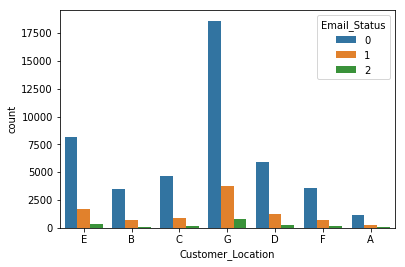

In [13]:
sns.countplot(x='Customer_Location', hue='Email_Status', data=data)

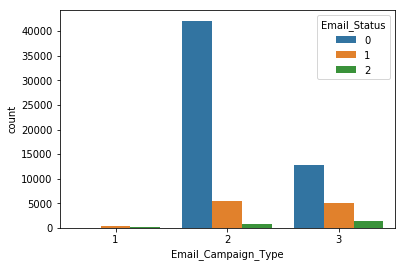

In [14]:
sns.countplot(x='Email_Campaign_Type', hue='Email_Status', data=data)

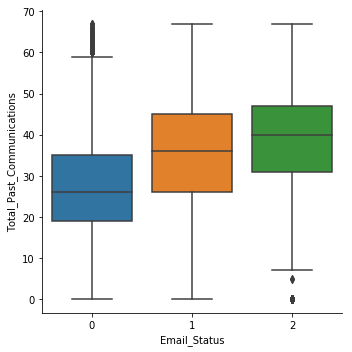

In [15]:
sns.catplot(y='Total_Past_Communications', x='Email_Status', data=data, kind='box') #hue='Email_Campaign_Type'

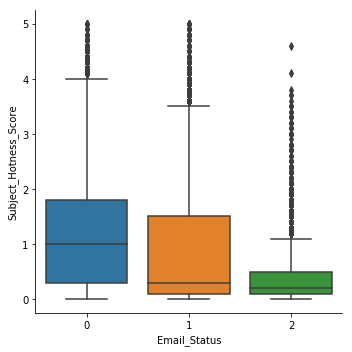

In [16]:
sns.catplot(y='Subject_Hotness_Score', x='Email_Status', data=data, kind='box')

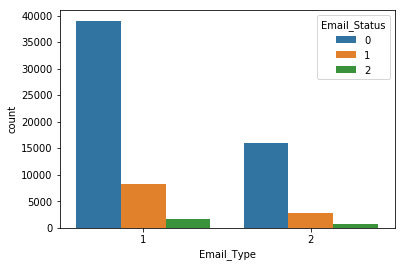

In [17]:
sns.countplot(x='Email_Type', hue='Email_Status', data=data)

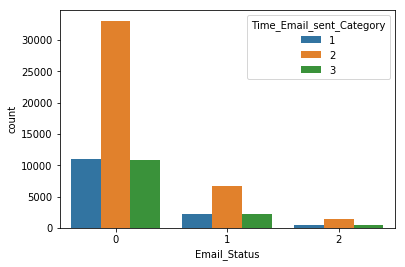

In [18]:
sns.countplot(hue='Time_Email_sent_Category', x='Email_Status', data=data)


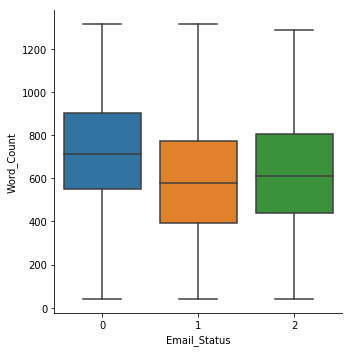

In [19]:
sns.catplot(y='Word_Count', x='Email_Status', data=data, kind='box')


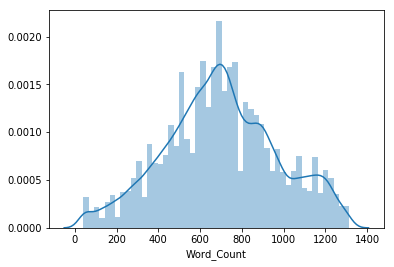

In [20]:
sns.distplot(data.Word_Count)

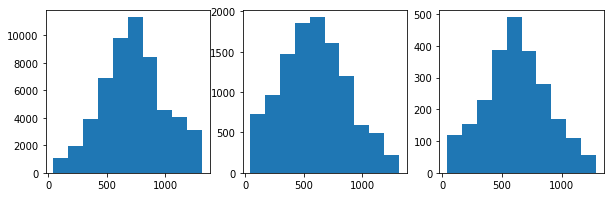

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(10,3))
for i, ax in enumerate(axs.flatten()):
    words = data[data['Email_Status'] == i]['Word_Count']
    ax.hist(words)

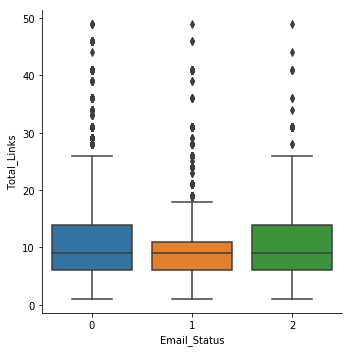

In [22]:
sns.catplot(y='Total_Links', x='Email_Status', data=data, kind='box')

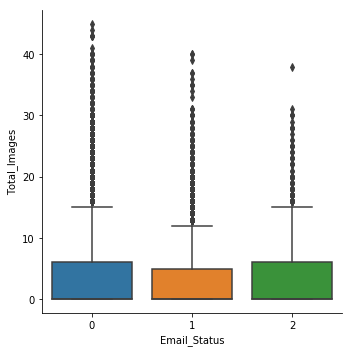

In [23]:
sns.catplot(y='Total_Images', x='Email_Status', data=data, kind='box')

In [24]:
data_for_undersample = data.copy()
data_for_undersample.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [25]:
data_for_undersample.Email_Status.replace(to_replace=2, value=1, inplace=True)
data_for_undersample.Email_Status.value_counts()

0    54941
1    13412
Name: Email_Status, dtype: int64

Text(0.5,0,'Email Status')

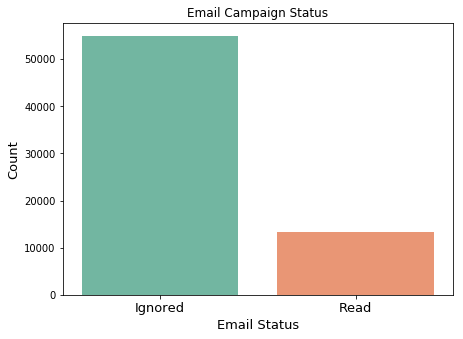

In [55]:
plt.figure(figsize=(7,5))


ax = sns.countplot(x='Email_Status', data=data_for_undersample, palette="Set2")
plt.title('Email Campaign Status')
#g.set(xticks=['Ignored','Read'])
ax.set_xticklabels(['Ignored','Read'],fontsize=13)
ax.set_ylabel('Count', fontsize=13)
ax.set_xlabel('Email Status', fontsize=13)

Text(0.5,0,'Email Status')

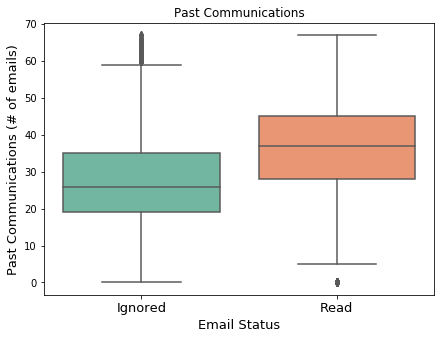

In [53]:
plt.figure(figsize=(7,5))


ax = sns.boxplot(y='Total_Past_Communications', x='Email_Status', data=data_for_undersample, palette="Set2")
plt.title('Past Communications')
ax.set_xticklabels(['Ignored','Read'],fontsize=13)
ax.set_ylabel('Past Communications (# of emails)', fontsize=13)
ax.set_xlabel('Email Status', fontsize=13)

Text(0.5,0,'Email Status')

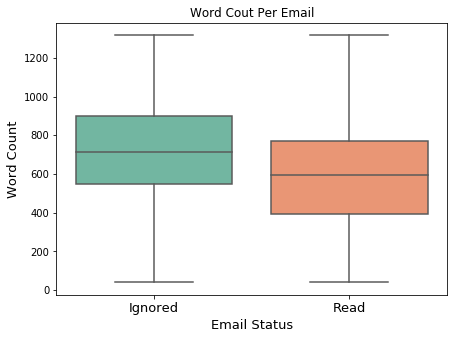

In [54]:
plt.figure(figsize=(7,5))

ax = sns.boxplot(y='Word_Count', x='Email_Status', data=data_for_undersample, palette="Set2") #, kind='box'
plt.title('Word Cout Per Email')
#g.set(xticks=['Ignored','Read'])
ax.set_xticklabels(['Ignored','Read'],fontsize=13)
ax.set_ylabel('Word Count', fontsize=13)
ax.set_xlabel('Email Status', fontsize=13)

In [23]:
data.Total_Links.value_counts()

11.0    11400
6.0     10644
4.0      7274
9.0      5824
8.0      5651
14.0     4967
21.0     4372
16.0     3922
5.0      2056
2.0      1357
3.0      1341
7.0      1129
31.0     1106
26.0      863
18.0      841
1.0       706
19.0      616
13.0      444
10.0      435
24.0      338
12.0      247
28.0      161
41.0      144
36.0       71
29.0       63
15.0       56
23.0       21
46.0       20
17.0       18
34.0       14
39.0       13
20.0       10
33.0        8
25.0        7
49.0        6
22.0        5
44.0        2
Name: Total_Links, dtype: int64

In [24]:
# Customer_Location            11595
# Total_Past_Communications     6825
# Total_Links                   2201
# Total_Images                  1677
data[(data['Customer_Location'].isnull())]

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
15,EMA00081000916030,2,1.9,1,NaN,2,23.0,2,694,4.0,0.0,0
21,EMA00081001689450,1,1.1,1,NaN,2,24.0,1,684,6.0,0.0,0
28,EMA00081002264510,1,2.8,1,NaN,2,NaN,1,339,11.0,10.0,1
35,EMA00081002862960,1,4.2,2,NaN,2,15.0,1,254,4.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
68323,EMA00089968041900,1,0.6,2,NaN,2,24.0,3,868,11.0,0.0,0
68325,EMA00089970622100,1,4.0,2,NaN,2,20.0,2,251,16.0,9.0,1
68335,EMA00089985404400,2,0.4,1,NaN,2,46.0,2,152,6.0,2.0,0
68347,EMA00089994827000,1,0.0,2,NaN,3,32.0,3,1173,9.0,0.0,2


In [25]:
data_c = data.copy()
data_c['Customer_Location'].fillna(data_c['Customer_Location'].mode()[0], inplace=True)

In [26]:
data_c[15:20]

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
15,EMA00081000916030,2,1.9,1,G,2,23.0,2,694,4.0,0.0,0
16,EMA00081001086910,1,2.1,2,B,2,34.0,3,610,21.0,4.0,0
17,EMA00081001137220,1,1.1,1,G,2,NaN,1,1061,21.0,15.0,0
18,EMA00081001215220,2,0.7,1,E,2,33.0,2,623,16.0,0.0,0
19,EMA00081001358710,1,1.6,2,F,2,37.0,1,560,6.0,0.0,0


In [27]:
data['Total_Past_Communications'].value_counts()

30.0    2990
20.0    2925
25.0    2391
40.0    2251
35.0    1881
        ... 
63.0      40
64.0      36
65.0      33
66.0      18
67.0       9
Name: Total_Past_Communications, Length: 64, dtype: int64

In [28]:
data['Total_Past_Communications'].unique()

array([33., 15., 36., 25., 18., nan, 34., 21., 40., 27., 24., 42., 11.,
       23., 37., 35., 51.,  9., 39., 31., 50., 30., 14., 45., 53., 28.,
        7., 38., 52., 22., 43., 12., 16., 20., 41., 56., 26., 29.,  5.,
       32., 44., 10., 17., 46., 47., 48.,  8., 49., 13.,  0.,  6., 55.,
       19., 60., 59., 61., 54., 62., 57., 64., 58., 65., 66., 67., 63.])

In [29]:
data_c['Total_Past_Communications'].fillna(np.around((data_c['Total_Past_Communications'].mean()), decimals=0), inplace=True)
data_c[28:30]

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
28,EMA00081002264510,1,2.8,1,G,2,29.0,1,339,11.0,10.0,1
29,EMA00081002403600,1,1.2,1,G,2,29.0,2,988,9.0,0.0,0


In [30]:
data_c['Total_Images'].fillna(data_c['Total_Images'].mode()[0], inplace=True)

In [31]:
data_c.Total_Links.value_counts()

11.0    11400
6.0     10644
4.0      7274
9.0      5824
8.0      5651
14.0     4967
21.0     4372
16.0     3922
5.0      2056
2.0      1357
3.0      1341
7.0      1129
31.0     1106
26.0      863
18.0      841
1.0       706
19.0      616
13.0      444
10.0      435
24.0      338
12.0      247
28.0      161
41.0      144
36.0       71
29.0       63
15.0       56
23.0       21
46.0       20
17.0       18
34.0       14
39.0       13
20.0       10
33.0        8
25.0        7
49.0        6
22.0        5
44.0        2
Name: Total_Links, dtype: int64

In [32]:
data_c['Total_Links'].fillna(np.ceil((data_c['Total_Links'].mean())), inplace=True)
data_c

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,G,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68348,EMA00089995974500,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0
68349,EMA00089998225300,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0
68350,EMA00089998436500,1,2.2,2,G,2,33.0,2,490,9.0,0.0,0
68351,EMA00089999168800,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0


In [33]:
data[data['Total_Links'].isnull()]

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
13,EMA00081000667000,2,4.0,1,E,2,11.0,2,565,NaN,0.0,0
14,EMA00081000781390,1,3.0,1,G,2,15.0,3,700,NaN,13.0,0
44,EMA00081003662300,2,0.9,1,E,2,38.0,1,700,NaN,0.0,0
108,EMA00081009511290,1,0.2,2,C,3,40.0,2,623,NaN,14.0,0
127,EMA00081011161830,1,1.5,2,G,2,17.0,3,842,NaN,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68295,EMA00089939970600,2,0.5,1,NaN,2,NaN,2,470,NaN,6.0,0
68302,EMA00089949985200,1,1.6,2,G,2,20.0,1,868,NaN,0.0,0
68343,EMA00089990006700,2,0.1,1,D,1,0.0,2,840,NaN,0.0,1
68344,EMA00089990097400,1,1.1,2,A,2,NaN,2,504,NaN,0.0,0


In [34]:
data_c[13:15]

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
13,EMA00081000667000,2,4.0,1,E,2,11.0,2,565,11.0,0.0,0
14,EMA00081000781390,1,3.0,1,G,2,15.0,3,700,11.0,13.0,0


In [35]:
data_c.isnull().sum()

Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Customer_Location            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

In [46]:
data_c.shape

(68353, 12)

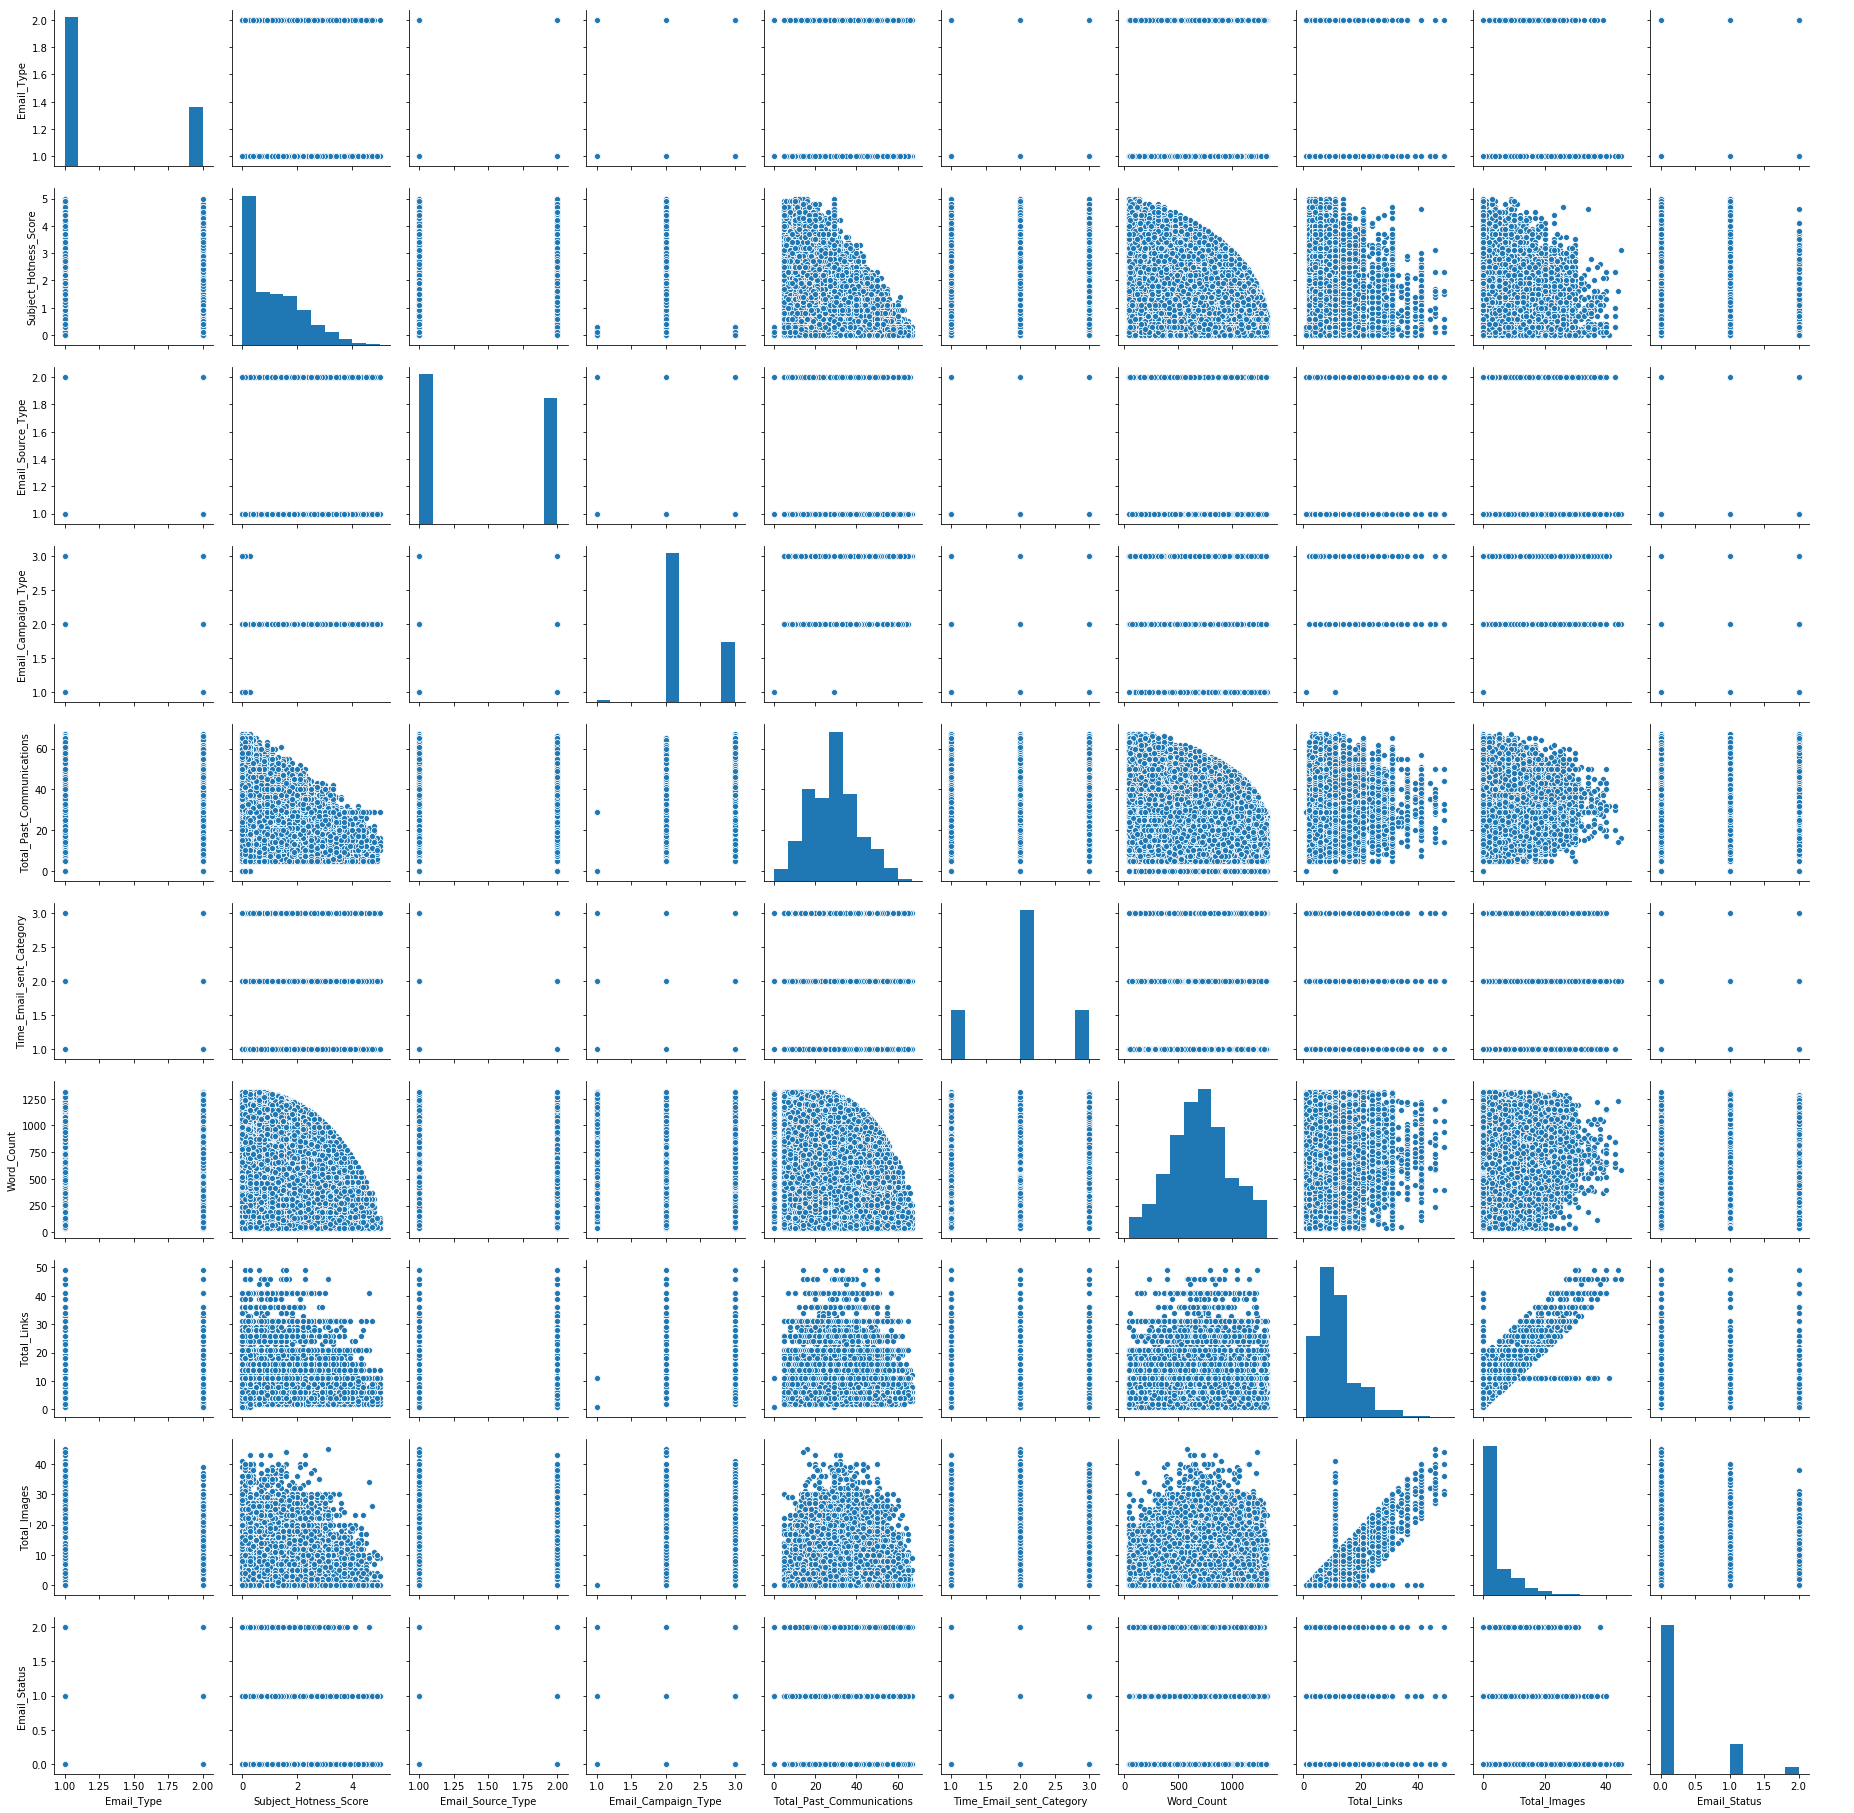

In [47]:
sns.pairplot(data_c)

In [66]:
data_c.Customer_Location.unique()

array(['E', 'G', 'B', 'C', 'D', 'F', 'A'], dtype=object)

In [69]:
data_c = pd.get_dummies(data_c, columns = ['Customer_Location'], drop_first=True, )

In [72]:
data_c.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Customer_Location_G
0,EMA00081000034500,1,2.2,2,2,33.0,1,440,8.0,0.0,0,0,0,0,1,0,0
1,EMA00081000045360,2,2.1,1,2,15.0,2,504,5.0,0.0,0,0,0,0,0,0,1
2,EMA00081000066290,2,0.1,1,3,36.0,2,962,5.0,0.0,1,1,0,0,0,0,0
3,EMA00081000076560,1,3.0,2,2,25.0,2,610,16.0,0.0,0,0,0,0,1,0,0
4,EMA00081000109720,1,0.0,2,3,18.0,2,947,4.0,0.0,0,0,1,0,0,0,0


In [90]:
data_y = data_c.copy()
data_y.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Customer_Location_G
0,EMA00081000034500,1,2.2,2,2,33.0,1,440,8.0,0.0,0,0,0,0,1,0,0
1,EMA00081000045360,2,2.1,1,2,15.0,2,504,5.0,0.0,0,0,0,0,0,0,1
2,EMA00081000066290,2,0.1,1,3,36.0,2,962,5.0,0.0,1,1,0,0,0,0,0
3,EMA00081000076560,1,3.0,2,2,25.0,2,610,16.0,0.0,0,0,0,0,1,0,0
4,EMA00081000109720,1,0.0,2,3,18.0,2,947,4.0,0.0,0,0,1,0,0,0,0


In [83]:
data_c_x = data_c.drop(columns=['Email_Status'])
data_c_x.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Customer_Location_G
0,EMA00081000034500,1,2.2,2,2,33.0,1,440,8.0,0.0,0,0,0,1,0,0
1,EMA00081000045360,2,2.1,1,2,15.0,2,504,5.0,0.0,0,0,0,0,0,1
2,EMA00081000066290,2,0.1,1,3,36.0,2,962,5.0,0.0,1,0,0,0,0,0
3,EMA00081000076560,1,3.0,2,2,25.0,2,610,16.0,0.0,0,0,0,1,0,0
4,EMA00081000109720,1,0.0,2,3,18.0,2,947,4.0,0.0,0,1,0,0,0,0


In [93]:
X = data_c_x.iloc[:,1:].values
y = data_y.loc[:,'Email_Status'].values

In [121]:
from collections import Counter
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.ensemble import RandomForestClassifier
from src.print import print_results

In [153]:
# splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 2)

In [157]:
# using random forest classifier
classifier1 = RandomForestClassifier

In [161]:
# kfold cross validation
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

accuracy1 = []
accuracy2 = []
precision = []
recall = []
f1 = []
#auc = []

kf = KFold(n_splits = 10, random_state = 42)
for train, test, in kf.split(X_train, y_train):
    pipeline = make_pipeline_imb(SMOTE('not majority'), classifier1(random_state=42))
    model = pipeline.fit(X_train[train], y_train[train])
    prediction = model.predict(X_train[test])
    
    accuracy1.append(pipeline.score(X_train[test], y_train[test]))
    accuracy2.append(accuracy_score(y_train[test], prediction))
    precision.append(precision_score(y_train[test], prediction, average='micro'))
    recall.append(recall_score(y_train[test], prediction, average='micro'))
    f1.append(f1_score(y_train[test], prediction, average='micro'))
    #auc.append(roc_auc_score(y_train[test], prediction, average='micro', multi_class='ovr'))


/Users/Jessie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [163]:
print('accuracy1: {}'.format(np.mean(accuracy1)))
print('accuracy2: {}'.format(np.mean(accuracy2)))
print('precision: {}'.format(np.mean(precision)))
print('recall: {}'.format(np.mean(recall)))
print('f1: {}'.format(np.mean(f1)))

accuracy1: 0.798433734939759
accuracy2: 0.798433734939759
precision: 0.798433734939759
recall: 0.798433734939759
f1: 0.798433734939759


In [170]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

accuracy1 = []
accuracy2 = []
precision = []
recall = []
f1 = []
#auc = []

clf = GradientBoostingClassifier
kf = KFold(n_splits = 5)
for train, test, in kf.split(X_train, y_train):
    pipeline = make_pipeline_imb(SMOTE('minority'), clf(min_samples_split=8, min_samples_leaf=8,random_state=42))
    model = pipeline.fit(X_train[train], y_train[train])
    prediction = model.predict(X_train[test])
    
    accuracy1.append(pipeline.score(X_train[test], y_train[test]))
    accuracy2.append(accuracy_score(y_train[test], prediction))
    precision.append(precision_score(y_train[test], prediction, average='micro'))
    recall.append(recall_score(y_train[test], prediction, average='micro'))
    f1.append(f1_score(y_train[test], prediction, average='micro'))
    #auc.append(roc_auc_score(y_train[test], prediction, average='micro', multi_class='ovr'))


In [171]:
print('accuracy1: {}'.format(np.mean(accuracy1)))
print('accuracy2: {}'.format(np.mean(accuracy2)))
print('precision: {}'.format(np.mean(precision)))
print('recall: {}'.format(np.mean(recall)))
print('f1: {}'.format(np.mean(f1)))

accuracy1: 0.8070740103270223
accuracy2: 0.8070740103270223
precision: 0.8070740103270223
recall: 0.8070740103270223
f1: 0.8070740103270223


In [172]:
clf_svm = SVC
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), clf_svm(random_state=42))
smote_model = smote_pipeline.fit(X_train, y_train)
smote_prediction = smote_model.predict(X_test)


KeyboardInterrupt: 

In [ ]:
accuracy_score(y_test, smote_prediction)
precision_score(y_test, smote_prediction, average='micro')
recall_score(y_test, smote_prediction, average='micro')
f1_score(y_test, smote_prediction, average='micro')

In [150]:
#build model with SMOTE imblearn
# smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), classifier(random_state=42))
# smote_model = smote_pipeline.fit(X_train, y_train)
# smote_prediction = smote_model.predict(X_test)
smote = SMOTE('not majority')
X_sm, y_sm = smote.fit_sample(X_train, y_train)
print(X_sm.shape, y_sm.shape)

(123543, 15) (123543,)


In [151]:
print('Original dataset shape %s' % Counter(y_train))

Original dataset shape Counter({0: 41181, 1: 8264, 2: 1819})


In [152]:
print('Resampled dataset shape %s' % Counter(y_sm))

Resampled dataset shape Counter({2: 41181, 0: 41181, 1: 41181})


In [1]:
data_c['Total_Past_Communications'].unique()

NameError: name 'data_c' is not defined